In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

%matplotlib inline

In [11]:
df = pd.read_csv('./data/2d-sample-data.csv')
df.head()

,Name,Age,Salary
0,a,27,70000
1,b,29,90000
2,c,29,61000
3,d,28,60000
4,e,42,150000


Text(0, 0.5, 'Salary')

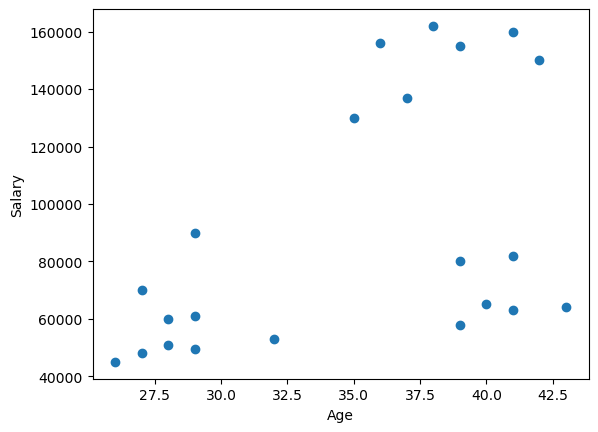

In [13]:
plt.scatter(df.Age, df.Salary)
plt.xlabel('Age')
plt.ylabel('Salary')

In [14]:
filteredDf = df[['Age', 'Salary']]
filteredDf.head()

,Age,Salary
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [15]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(filteredDf)
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [16]:
df['cluster'] = y_predicted
df.head()

,Name,Age,Salary,cluster
0,a,27,70000,0
1,b,29,90000,0
2,c,29,61000,2
3,d,28,60000,2
4,e,42,150000,1


In [17]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [22]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]

df1.head()
df2.head()

,Name,Age,Salary,cluster
4,e,42,150000,1
5,f,39,155000,1
6,g,41,160000,1
7,h,38,162000,1
8,i,36,156000,1


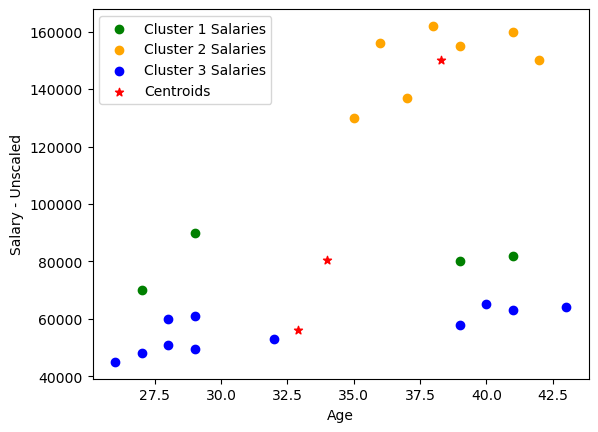

In [43]:
plt.scatter(df1.Age, df1.Salary, color='green', label='Cluster 1 Salaries')
plt.scatter(df2.Age, df2.Salary, color='orange', label='Cluster 2 Salaries')
plt.scatter(df3.Age, df3.Salary, color='blue', label='Cluster 3 Salaries')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='red', marker='*', label='Centroids')

plt.xlabel('Age')
plt.ylabel('Salary - Unscaled')

plt.legend()
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1])

# After scaling using MinMaxScaler

In [44]:
scaledDf = df
scaledDf.head()

,Name,Age,Salary,cluster
0,a,27,70000,0
1,b,29,90000,0
2,c,29,61000,2
3,d,28,60000,2
4,e,42,150000,1


In [64]:
scaler = MinMaxScaler()

scaler.fit(scaledDf[['Salary']])
scaler.fit(scaledDf[['Age']])

scaledDf.Salary = scaler.transform(scaledDf[['Salary']])
scaledDf.Age = scaler.transform(scaledDf[['Age']])

scaledDf.head()

/Users/anandthanumalayan/opt/anaconda3/envs/ds-tryouts/lib/python3.8/site-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- Salary
Feature names seen at fit time, yet now missing:
- Age

  warnings.warn(message, FutureWarning)


,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
0,a,0.058824,4116.117647,0,2,0.058824,4116.117647
1,b,0.176471,5292.588235,0,2,0.176471,5292.588235
2,c,0.176471,3586.705882,2,0,0.176471,3586.705882
3,d,0.117647,3527.882353,2,0,0.117647,3527.882353
4,e,0.941176,8822.000000,1,1,0.941176,8822.000000


In [54]:
scaledDfFiltered = scaledDf[['Age', 'Salary']]
scaledDfFiltered.head()

,Age,Salary
0,0.058824,4116.117647
1,0.176471,5292.588235
2,0.176471,3586.705882
3,0.117647,3527.882353
4,0.941176,8822.000000


In [70]:
km_post_scaling = KMeans(n_clusters=3)
clustersPostScaling = km_post_scaling.fit_predict(scaledDfFiltered)
clustersPostScaling

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0],
      dtype=int32)

In [71]:
scaledDf['clustersPostScaling'] = clustersPostScaling
scaledDf

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
0,a,0.058824,4116.117647,0,2,0.058824,4116.117647
1,b,0.176471,5292.588235,0,2,0.176471,5292.588235
2,c,0.176471,3586.705882,2,0,0.176471,3586.705882
3,d,0.117647,3527.882353,2,0,0.117647,3527.882353
4,e,0.941176,8822.000000,1,1,0.941176,8822.000000
5,f,0.764706,9116.117647,1,1,0.764706,9116.117647
6,g,0.882353,9410.235294,1,1,0.882353,9410.235294
7,h,0.705882,9527.882353,1,1,0.705882,9527.882353
8,i,0.588235,9174.941176,1,1,0.588235,9174.941176
9,j,0.529412,7645.529412,1,1,0.529412,7645.529412


In [58]:
scaledDf['Original_Age'] = df.Age
scaledDf['Original_Salary'] = df.Salary
scaledDf

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
0,a,0.058824,4116.117647,0,2,0.058824,4116.117647
1,b,0.176471,5292.588235,0,2,0.176471,5292.588235
2,c,0.176471,3586.705882,2,0,0.176471,3586.705882
3,d,0.117647,3527.882353,2,0,0.117647,3527.882353
4,e,0.941176,8822.000000,1,1,0.941176,8822.000000
5,f,0.764706,9116.117647,1,1,0.764706,9116.117647
6,g,0.882353,9410.235294,1,1,0.882353,9410.235294
7,h,0.705882,9527.882353,1,1,0.705882,9527.882353
8,i,0.588235,9174.941176,1,1,0.588235,9174.941176
9,j,0.529412,7645.529412,1,1,0.529412,7645.529412


# Plotting post scaling

In [72]:
df4 = scaledDf[scaledDf.clustersPostScaling == 0]
df5 = scaledDf[scaledDf.clustersPostScaling == 1]
df6 = scaledDf[scaledDf.clustersPostScaling == 2]

df4.head()

,Name,Age,Salary,cluster,clustersPostScaling,Original_Age,Original_Salary
2,c,0.176471,3586.705882,2,0,0.176471,3586.705882
3,d,0.117647,3527.882353,2,0,0.117647,3527.882353
11,l,0.000000,2645.529412,2,0,0.000000,2645.529412
12,m,0.058824,2822.000000,2,0,0.058824,2822.000000
13,n,0.117647,2998.470588,2,0,0.117647,2998.470588


In [73]:
km_post_scaling.cluster_centers_

array([[4.06417112e-01, 3.30060963e+03],
       [7.22689076e-01, 8.82200000e+03],
       [4.70588235e-01, 4.73376471e+03]])

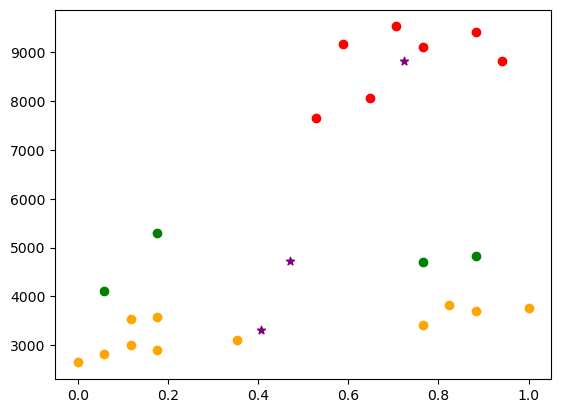

In [74]:
plt.scatter(df4.Age, df4.Salary, color='orange', label='Cluster 1 Salaries')
plt.scatter(df5.Age, df5.Salary, color='red', label='Cluster 3 Salaries')
plt.scatter(df6.Age, df6.Salary, color='green', label='Cluster 3 Salaries')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='Centroids')

## Scaling did not improve results so far

## Elbow plot to check if the chosen cluster numbers is right

In [76]:
# Inertia or Sum of squared errors for cluster size = 3
km_post_scaling.inertia_

5456906.7781422725

In [80]:
scaledDfFiltered.head()

,Age,Salary
0,0.058824,4116.117647
1,0.176471,5292.588235
2,0.176471,3586.705882
3,0.117647,3527.882353
4,0.941176,8822.000000


In [77]:
sse = []
k_range = range(1, 10)

for k in k_range:
    km_range = KMeans(n_clusters=k)
    km_range.fit(scaledDfFiltered)
    sse.append(km_range.inertia_)

sse

[137536845.8773199,
 11481778.343120774,
 5456906.7781422725,
 2819190.4645486,
 1025953.0037897513,
 824107.3636101501,
 600808.6313148787,
 413957.14111880015,
 329182.04769319453]

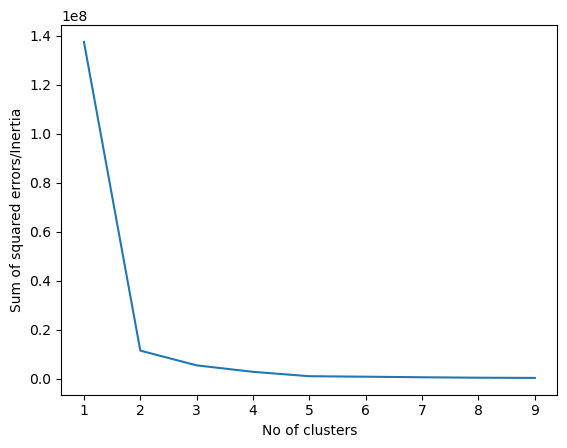

In [79]:
plt.xlabel('No of clusters')
plt.ylabel('Sum of squared errors/Inertia')
plt.plot(k_range, sse)